<font size = "5"> **Lecture 2:  [Information in STEM](https://github.com/gduscher/ML-ElectronMicroscopy-2023/tree/main/Lecture%202)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />


# Adaptive Fourier Filtering


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/Lecture%202/0_LoadFile.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SergeiVKalinin/ML-ElectronMicroscopy-2023/blob/main/Lecture%202/0_LoadFile.ipynb)

part of Online Course

<font size = "5"> **[Machine Learning in Scanning Electron Microscopy 2023](https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023)**</font>

<font size = "3"> **[Lecture 2](https://github.com/gduscher/ML-ElectronMicroscopy-2023/tree/main/Lecture%202)**</font>

by Gerd Duscher, 2023


Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville




An introduction into Fourier Filtering of images.






## Content

An introduction into Fourier analysis of images.

## Prerequesites

### Install packages

If you run this in Google Colab or if you want to test your local installation "run the code cell below" to ensure that [pyTEMlib](https://github.com/gduscher/pyTEMlib) and dependent packages are installed.



In [1]:
import sys

from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = (get_distribution(package_name).version)
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2023.5.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/sidpy.git@main -q
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/SciFiReaders.git@main -q
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@use_dict_2 -q
    
# ------------------------------
print('done')

done


## Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets. 

This notebook is based on the **image_tool** package of pyTEMlib 


In [7]:
%load_ext autoreload
%autoreload 2

sys.path.insert(0, '../../../pyTEMlib')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%matplotlib ipympl
import numpy as np
import matplotlib.pylab as plt 

import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

import pyTEMlib
from pyTEMlib import file_tools     # File input/ output library
from pyTEMlib import image_tools     # File input/ output library

print('pyTEMlib version: ', pyTEMlib.__version__)
note_book_version = '2023.01.20'
note_book_name='pyTEMib/notebooks/Imaging/Adaptive_Fourier_Filter'

pyTEMlib version:  0.2023.5.1


## Open File

Note: select the file and the dataset, in case there are several.

In [9]:
fileWidget = file_tools.FileWidget()

Now, we open and plot the selected dataset. Select another one and rerun only cell below (Home button gets you back to original).
>
> Please note that you can zoom and drag the intensity values in the colorbar.
>

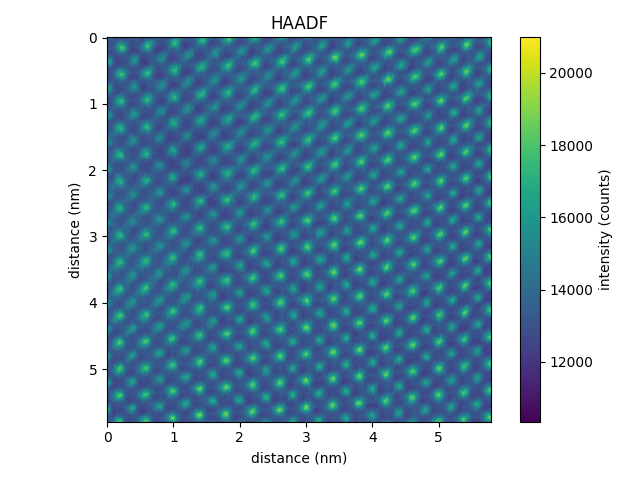

In [10]:
dataset = fileWidget.selected_dataset

if dataset.data_type.name != 'IMAGE':
    print('We really would need an image here')

view = dataset.plot()

## Power Spectrum of Image

fft :
	smoothing : 1
	minimum_intensity : 12.411012953318904
	maximum_intensity : 19.61143382718604
source:  HAADF


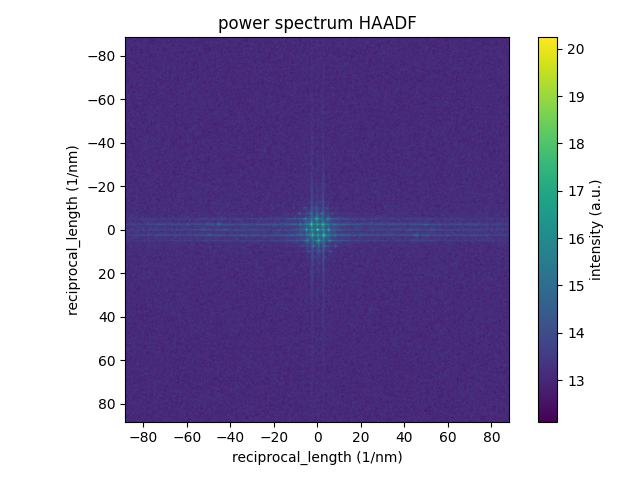

In [11]:
power_spectrum = it.power_spectrum(dataset, smoothing=1)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = power_spectrum.plot()

## Spot Detection in Fourier Transform

Found 39 reflections


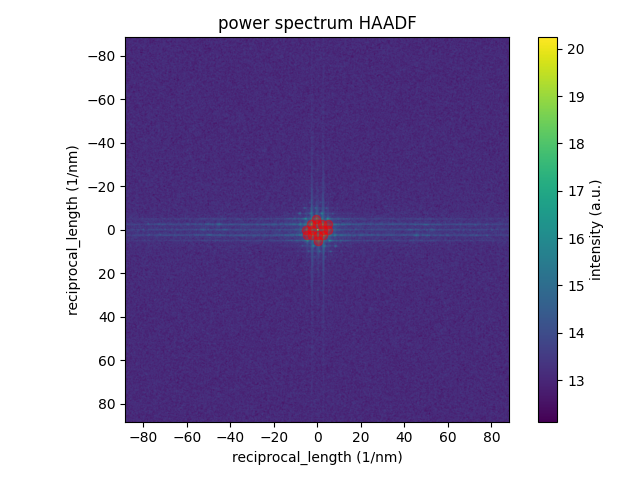

In [13]:
# ------Input----------
spot_threshold=0.09
# ---------------------

spots = it.diffractogram_spots(power_spectrum, spot_threshold=spot_threshold)
spots = spots[np.linalg.norm(spots[:,:2],axis=1)<6,:]
spots = spots[np.linalg.norm(spots[:,:2],axis=1)>0.5,:]
power_spectrum.plot()

plt.gca().scatter(spots[:,0],spots[:,1], color='red', alpha=0.4);

## Adaptive Fourier Filter

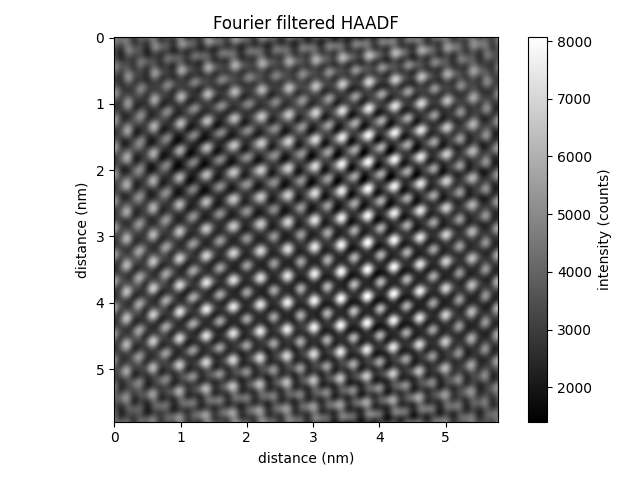

In [14]:
filtered_dataset = image_tools.adaptive_fourier_filter(dataset, spots, low_pass=2.0, reflection_radius=.3)
view = filtered_dataset.plot(cmap='gray')

Let's see what we did - In Fourier space, of course.

fft :
	smoothing : 1
	minimum_intensity : 10.348526633131083
	maximum_intensity : 16.269362695205977
source:  p1-hr4


<IPython.core.display.Javascript object>


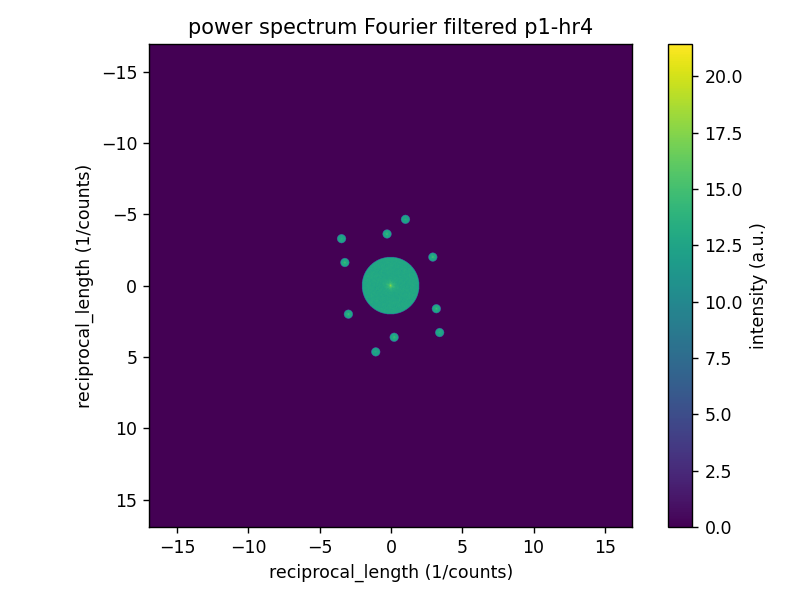

In [21]:
filtered_power_spectrum = it.power_spectrum(filtered_dataset, smoothing=0)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = filtered_power_spectrum.plot()

Please note that the spots are ordered from center to outside.

The third parameter of a spot is its angle.

In [22]:
print(spots[:5])

[[-2.96019421  2.00102513 -0.97637533]
 [ 2.96019421 -2.00102513  2.16521733]
 [-3.20825517 -1.62066498 -2.03855914]
 [ 3.20825517  1.62066498  1.10303351]
 [-0.24806097 -3.62169012 -3.07320631]]


## Log the result

In [23]:
filtered_dataset.title = 'Fourier_Filtered_Image'
datasets.update({'Log_000': filtered_dataset})

### Save Datasets to file

In [24]:
group = ft.save_dataset(datasets, filename=dataset.metadata['filename'])

C:\Users\gduscher\.conda\envs\ase\lib\site-packages\pyNSID\io\hdf_io.py:111: UserWarning: main_data_name should not contain the "-" character. Reformatted name from:p1-hr4 to p1_hr4
  warn('main_data_name should not contain the "-" character. Reformatted'
C:\Users\gduscher\.conda\envs\ase\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\.conda\envs\ase\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


A convenient function to select a dataset (for further processing, visualization or whatever)

In [25]:
chooser = ft.ChooseDataset(datasets)

Dropdown(description='select dataset:', options=('Channel_000: p1-hr4', 'Log_000: Fourier_Filtered_Image'), va…

In [31]:
chooser.dataset.metadata

{'analysis': 'adaptive fourier filtered',
 'spots': array([[-9.65317383e-01,  6.43544922e-01, -9.82793723e-01],
        [ 9.65317383e-01, -6.43544922e-01,  2.15879893e+00],
        [ 1.69464442e-12, -1.42499233e+00,  3.14159265e+00],
        [ 1.69464442e-12,  1.42499233e+00,  1.18923056e-12],
        [-1.83869978e+00, -7.35479911e-01, -1.95130270e+00],
        [ 1.83869978e+00,  7.35479911e-01,  1.19028995e+00],
        [ 1.69464442e-12, -2.06853725e+00,  3.14159265e+00],
        [ 1.69464442e-12,  2.06853725e+00,  8.19247720e-13],
        [-2.29837472e+00,  1.69464442e-12, -1.57079633e+00],
        [ 2.29837472e+00,  1.69464442e-12,  1.57079633e+00],
        [-1.93063477e+00,  1.33305734e+00, -9.66490820e-01],
        [ 1.93063477e+00, -1.33305734e+00,  2.17510183e+00],
        [-2.75804967e+00,  1.69464442e-12, -1.57079633e+00],
        [ 2.75804967e+00,  1.69464442e-12,  1.57079633e+00],
        [ 1.69464442e-12, -2.80401716e+00,  3.14159265e+00],
        [ 1.69464442e-12,  2.80401

A tree-like plot of the file

In [26]:
print(dataset.h5_dataset.file.filename)
ft.h5_tree(dataset.h5_dataset.file)

C:/Users/gduscher/Documents/Github/MSE672-Introduction-to-TEM/example_data\p1-hr4-ZnOonGraphite.hf5
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ p1_hr4
      ------
      ├ metadata
        --------
        ├ experiment
          ----------
      ├ original_metadata
        -----------------
        ├ DM
          --
        ├ DocumentObjectList
          ------------------
          ├ 0
            -
            ├ AnnotationGroupList
              -------------------
              ├ 0
                -
                ├ Font
                  ----
                ├ ObjectTags
                  ----------
            ├ ImageDisplayInfo
              ----------------
              ├ DimensionLabels
                ---------------
              ├ MainSliceId
                -----------
            ├ ObjectTags
              ----------
        ├ DocumentTags
          ------------
        ├ Image Behavior
          --------------
          ├ UnscaledTransfor

## Close File
let's close the file but keep the filename

In [27]:
dataset.h5_dataset.file.close()

## Simulate new notebook
We can now simulate a new notebook and open the file again.



In [3]:
new_dataset= ft.open_file()
choose_image = ft.ChooseDataset(new_dataset)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

<IPython.core.display.Javascript object>


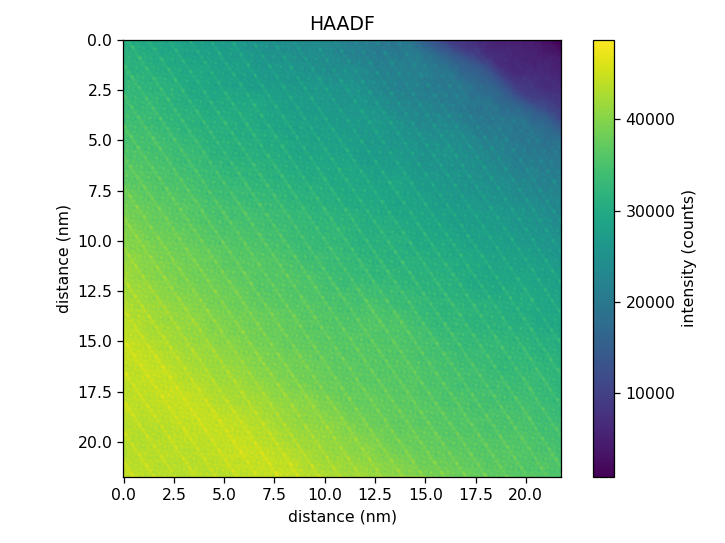

In [5]:
view = choose_image.dataset.plot()

We want to make an image operation of the images in the file.

In [7]:
choose_image = ft.ChooseDataset(new_dataset)
print('       subtract')
choose_image2 = ft.ChooseDataset(new_dataset)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

       subtract


Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

<IPython.core.display.Javascript object>


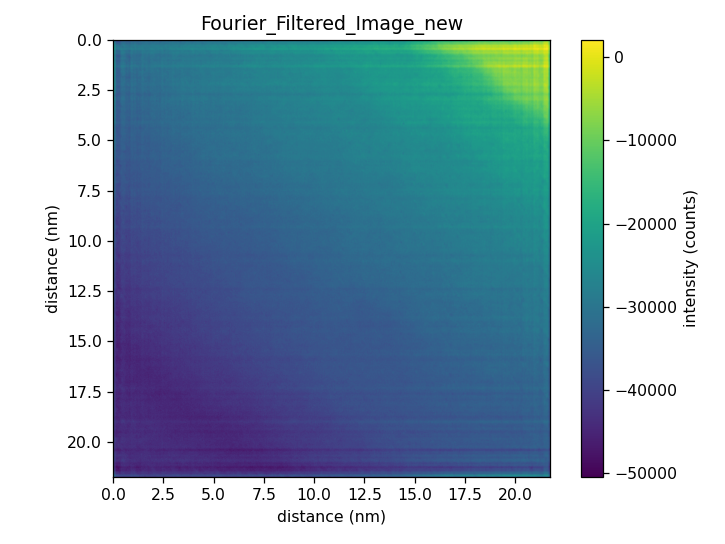

In [10]:
new_image = np.array(choose_image.dataset) - np.array(choose_image2.dataset)
new_image = choose_image.dataset.like_data(new_image)
vew = new_image.plot()